# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    mean_squared_error
)
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Reading in the Data

In [2]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

# Wrapper Function

In [3]:
def evaluate_classification_method(mod):
    y_pred = mod.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    labels = ["Dropout", "Enrolled", "Graduate"]
    full_report = classification_report(y_test, y_pred, target_names=labels)

    print(f"Accuracy classification score: {accuracy}")
    print(f"F1 score: {f1}")
    print(full_report)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    return accuracy, f1, full_report, cm

def test_knn(range, train_accuracy, test_accuracy):
    for a, b in enumerate(range):
        knn = KNeighborsClassifier(n_neighbors = b, p = 2) #p = 2 is euclidean distance
        knn.fit(X_train, y_train.values.ravel())
        train_accuracy[a] = knn.score(X_train, y_train)
        test_accuracy[a] = knn.score(X_test, y_test)
    plt.title('KNN with different number of neighbours')
    plt.plot(knnrange, test_accuracy, label = 'Test Accuracy')
    plt.plot(knnrange, train_accuracy, label = 'Train accuracy')
    plt.legend()
    plt.xticks(knnrange)
    plt.xlabel('Number of neighbours')
    plt.ylabel('Accuracy')
    plt.show()

# KNN Classification

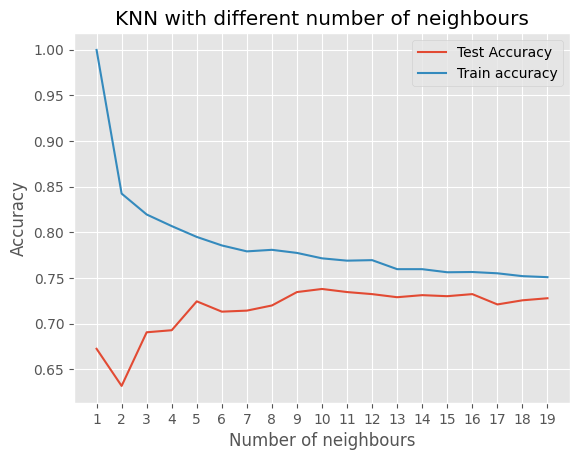

In [4]:
knnrange = np.arange(1, 20)
train_accuracy =np.empty(len(knnrange))
test_accuracy = np.empty(len(knnrange))
test_knn(knnrange, train_accuracy, test_accuracy)

Accuracy classification score: 0.631638418079096
F1 score: 0.624054119753727
              precision    recall  f1-score   support

     Dropout       0.64      0.79      0.71       284
    Enrolled       0.30      0.37      0.33       151
    Graduate       0.81      0.62      0.70       450

    accuracy                           0.63       885
   macro avg       0.58      0.59      0.58       885
weighted avg       0.67      0.63      0.64       885



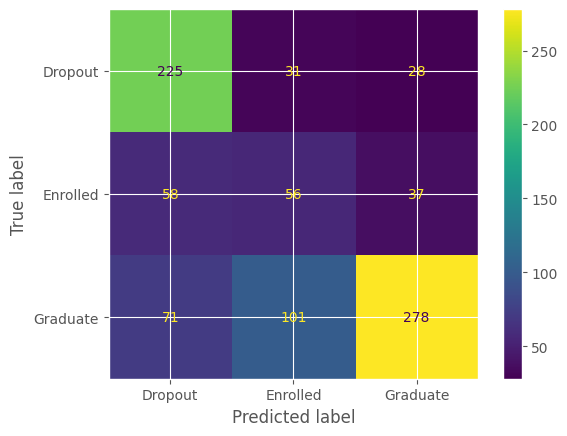

In [5]:
#best Classifier is when number of neighbours is 2
knn_model = KNeighborsClassifier(n_neighbors = 2, p = 2)
knn_model.fit(X_train, y_train.values.ravel())
knn_accuracy, knn_f1, knn_full_report, knn_cm = evaluate_classification_method(knn_model)

# SVM

Accuracy classification score: 0.7672316384180791
F1 score: 0.7777834707785258
              precision    recall  f1-score   support

     Dropout       0.83      0.69      0.75       284
    Enrolled       0.50      0.40      0.44       151
    Graduate       0.80      0.94      0.87       450

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

Accuracy classification score: 0.7751412429378531
F1 score: 0.785895527881765
              precision    recall  f1-score   support

     Dropout       0.83      0.73      0.78       284
    Enrolled       0.55      0.40      0.46       151
    Graduate       0.80      0.93      0.86       450

    accuracy                           0.78       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.78      0.76       885

Accuracy classification score: 0.7288135593220338
F1 score: 0.7605196344584838
  

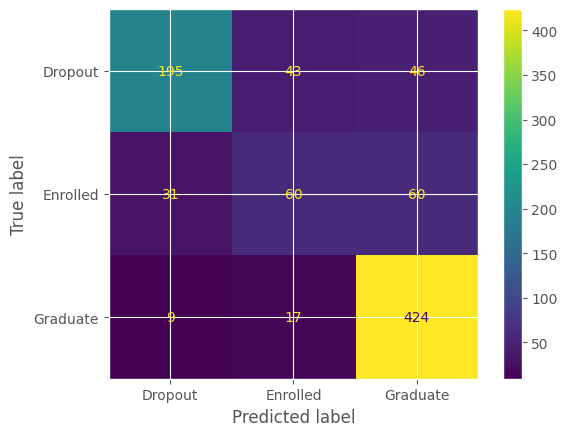

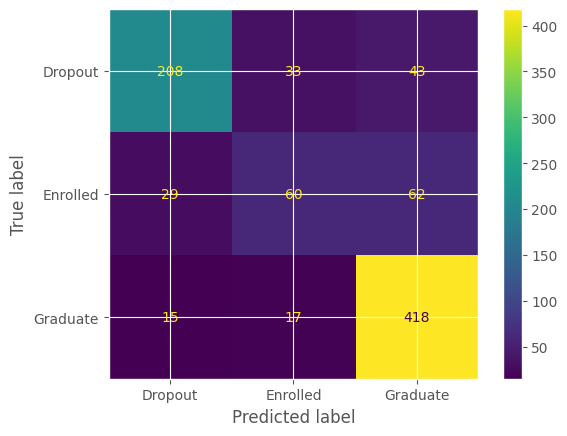

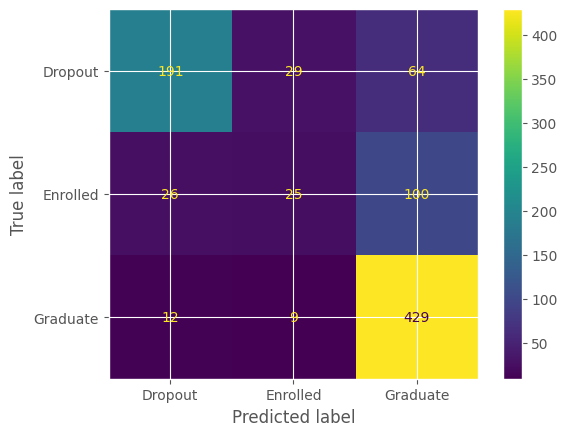

In [6]:
svm_linear_model = svm.SVC(kernel='linear')
svm_linear_model.fit(X_train, y_train.values.ravel())

svm_linear_accuracy, svm_linear_f1, svm_linear_full_report, svm_linear_cm = evaluate_classification_method(svm_linear_model)

svm_rbf_model = svm.SVC(kernel='rbf')
svm_rbf_model.fit(X_train, y_train.values.ravel())
svm_rbf_accuracy, svm_rbf_f1, svm_rbf_full_report, svm_rbf_cm = evaluate_classification_method(svm_rbf_model)


svm_poly_model = svm.SVC(kernel='poly', degree = 3)
svm_poly_model.fit(X_train, y_train.values.ravel())
svm_poly_accuracy, svm_poly_f1, svm_poly_full_report, svm_poly_cm = evaluate_classification_method(svm_poly_model)

Radial and Linear performs way better than polynomial SVM fitting, therefore I'll continue using those two, and tune the following gamma and regularisation parameters.

In [7]:
"""
C_range = np.logspace(-2, 10, 13) #taken from SciKit Learn documentation
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma = gamma_range, C = C_range)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train.values.ravel())

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
"""

'\nC_range = np.logspace(-2, 10, 13) #taken from SciKit Learn documentation\ngamma_range = np.logspace(-9, 3, 13)\nparam_grid = dict(gamma = gamma_range, C = C_range)\ncv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)\ngrid = GridSearchCV(svm.SVC(kernel=\'linear\'), param_grid=param_grid, cv=cv)\ngrid.fit(X_train, y_train.values.ravel())\n\nprint(\n    "The best parameters are %s with a score of %0.2f"\n    % (grid.best_params_, grid.best_score_)\n)\n'